<a href="https://colab.research.google.com/github/Godwin-Bright/Machine-Learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [ ]:
x = df.drop("CustomerID",axis=1)
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
y = df["CustomerID"]
y

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(x,y, train_size=0.5, test_size=0.5, random_state=0)
test_X

,Age,Annual Income (k$),Spending Score (1-100)
18,52,23,29
170,40,87,13
107,54,63,46
98,48,61,42
177,27,88,69
...,...,...,...
178,59,93,14
175,30,88,86
126,43,71,35
93,40,60,40


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression(random_state =0)
ml.fit(train_X,train_y)

LogisticRegression(random_state=0)

In [ ]:
y_pred = ml.predict( test_X)
print(y_pred )

[ 33 193 111 117 200 187   2 187  33 175  66 168 199 141  71  12  42 141
  12  71 200 168  18 168  71 128 194 194 166  33   7  35 157 115   7 194
 128   1  73  71 163  51   7  92 193  71  33  66 117 168  43 163 199 115
 168  33  33 177  58  54 128 117 194  12 174 111  58 168  10 103 174  71
 168 111 163 117  71   7  10 168 200  54 163 200  71  71   7  58 157 200
  10  33 199  71 199 177 194 165 122 122]


Text(0.5, 1.0, 'Actual vs predicted')

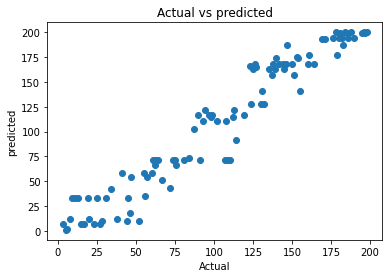

In [ ]:
plt.scatter(test_y,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred ,test_y)

0.0

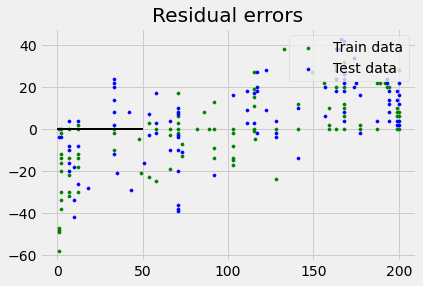

In [ ]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(ml.predict(train_X), ml.predict(train_X) - train_y,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(ml.predict(test_X), ml.predict(test_X) - test_y,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()